# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

# Loading data

In [2]:
train = []

DATA_DIR = './raw-img/'
CATEGORIES = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']
IMG_SIZE = (150, 150)

for label, category in enumerate(CATEGORIES):
    path = os.path.join(DATA_DIR, category)
    images = os.listdir(path)
    for img in images:
        img_array = cv2.imread(os.path.join(path, img))
        resized_img = cv2.resize(img_array, IMG_SIZE)
        train.append([resized_img, label])

random.shuffle(train)

In [3]:
X = []
y = []

for features, label in train:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3) / 255.0
y = np.array(y)

# Building CNN model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training & evaluating the model

In [5]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
657/657 [==============================] - 4251s 6s/step - loss: 1.7266 - accuracy: 0.4056 - val_loss: 1.4217 - val_accuracy: 0.5271
Epoch 2/10
657/657 [==============================] - 3882s 6s/step - loss: 1.2159 - accuracy: 0.5899 - val_loss: 1.2337 - val_accuracy: 0.5841
Epoch 3/10
657/657 [==============================] - 2664s 4s/step - loss: 0.9798 - accuracy: 0.6734 - val_loss: 1.1479 - val_accuracy: 0.6203
Epoch 4/10
657/657 [==============================] - 2034s 3s/step - loss: 0.7765 - accuracy: 0.7431 - val_loss: 1.1635 - val_accuracy: 0.6333
Epoch 5/10
657/657 [==============================] - 1557s 2s/step - loss: 0.6003 - accuracy: 0.7982 - val_loss: 1.2354 - val_accuracy: 0.6384
Epoch 6/10
657/657 [==============================] - 1631s 2s/step - loss: 0.4338 - accuracy: 0.8523 - val_loss: 1.4157 - val_accuracy: 0.6234
Epoch 7/10
657/657 [==============================] - 1727s 3s/step - loss: 0.2968 - accuracy: 0.9004 - val_loss: 1.7922 - val_accuracy:

# Enter new data

Sheep are quadrupedal, ruminant mammals kept as livestock. Like all ruminants, sheep are even-toed ungulates, also commonly called cloven-hoofed animals. Although the name â€˜sheepâ€™ applies to many species, in everyday usage it almost always refers to Ovis aries. Domestic sheep are the most numerous species in their genus and are most likely descended from the wild mouflon of Europe and Asia. Today, there are about one billion sheep on the planet and around 900 different breeds, many of these sub-classable.
Female sheep are called Ewes. Intact males are called Rams. Year old sheep are called Hoggets. Baby sheep are called Lambs A group of sheep is referred to as a mob or a flock.
Sheep are typically with horns forming a lateral spiral and crimped hair called wool. A sheep is an animal which has a thick coat of fleece on its body. Another trait unique to sheep are their wide variation in colour. Wild sheep are largely variations of brown hues. Colours of domestic sheep range from pure

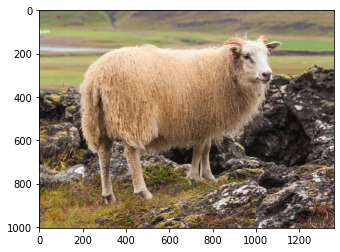

In [26]:
img_path = input('Enter image name: ')

img_array = cv2.imread(os.path.join('./', img_path))
rgb_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
resized_img = cv2.resize(img_array, IMG_SIZE)

input_img = np.array(resized_img).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3) / 255.0

prediction = model.predict(input_img)

category = CATEGORIES[np.argmax(prediction)]

description_file = open(f'./descriptions/{category}.txt', 'r')
description = description_file.read()

print(description)